## Imports

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/XAI/GroupProj

/content/drive/MyDrive/Colab Notebooks/XAI/GroupProj


## Load data

In [4]:
# Column names as specified
column_names = [
    "ID", "Age", "Gender", "Edu", "Country", "Ethn", "Neuro", "Extr", "Open",
    "Agree", "Consc", "Impul", "Sensat", "Alc", "Amphet", "Amyl", "Benzos",
    "Caff", "Can", "Choco", "Coke", "Crack", "Ecst", "Her", "Ket", "Leghighs",
    "LSD", "Meth", "Mush", "Nico", "Semeron", "VSA"
]

# Load the CSV file without a header and assign the column names
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/XAI/GroupProj/drug_consumption.csv', header=None, names=column_names)

# Display the first few rows to verify
df.head()

,ID,Age,Gender,Edu,Country,Ethn,Neuro,Extr,Open,Agree,...,Ecst,Her,Ket,Leghighs,LSD,Meth,Mush,Nico,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## 1. Understanding the Dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1885 non-null   int64  
 1   Age       1885 non-null   float64
 2   Gender    1885 non-null   float64
 3   Edu       1885 non-null   float64
 4   Country   1885 non-null   float64
 5   Ethn      1885 non-null   float64
 6   Neuro     1885 non-null   float64
 7   Extr      1885 non-null   float64
 8   Open      1885 non-null   float64
 9   Agree     1885 non-null   float64
 10  Consc     1885 non-null   float64
 11  Impul     1885 non-null   float64
 12  Sensat    1885 non-null   float64
 13  Alc       1885 non-null   object 
 14  Amphet    1885 non-null   object 
 15  Amyl      1885 non-null   object 
 16  Benzos    1885 non-null   object 
 17  Caff      1885 non-null   object 
 18  Can       1885 non-null   object 
 19  Choco     1885 non-null   object 
 20  Coke      1885 non-null   obje

In [6]:
# print those out and see what we have
df.nunique()

ID          1885
Age            6
Gender         2
Edu            9
Country        7
Ethn           7
Neuro         49
Extr          42
Open          35
Agree         41
Consc         41
Impul         10
Sensat        11
Alc            7
Amphet         7
Amyl           7
Benzos         7
Caff           7
Can            7
Choco          7
Coke           7
Crack          7
Ecst           7
Her            7
Ket            7
Leghighs       7
LSD            7
Meth           7
Mush           7
Nico           7
Semeron        5
VSA            7
dtype: int64

In [7]:
for col in df.select_dtypes(include=[object]):

    print(f" Column {col}, has options:, {df[col].unique()}")

 Column Alc, has options:, ['CL5' 'CL6' 'CL4' 'CL2' 'CL1' 'CL0' 'CL3']
 Column Amphet, has options:, ['CL2' 'CL0' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6']
 Column Amyl, has options:, ['CL0' 'CL2' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6']
 Column Benzos, has options:, ['CL2' 'CL0' 'CL3' 'CL1' 'CL4' 'CL5' 'CL6']
 Column Caff, has options:, ['CL6' 'CL5' 'CL4' 'CL3' 'CL0' 'CL1' 'CL2']
 Column Can, has options:, ['CL0' 'CL4' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5']
 Column Choco, has options:, ['CL5' 'CL6' 'CL4' 'CL0' 'CL3' 'CL2' 'CL1']
 Column Coke, has options:, ['CL0' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5' 'CL4']
 Column Crack, has options:, ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL4' 'CL6']
 Column Ecst, has options:, ['CL0' 'CL4' 'CL1' 'CL3' 'CL2' 'CL6' 'CL5']
 Column Her, has options:, ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL6' 'CL4']
 Column Ket, has options:, ['CL0' 'CL2' 'CL3' 'CL1' 'CL5' 'CL4' 'CL6']
 Column Leghighs, has options:, ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL4' 'CL6']
 Column LSD, has options:, ['CL0' 'CL2' 'CL1' 'CL3' 'CL4' 

In [8]:
df.dtypes

ID            int64
Age         float64
Gender      float64
Edu         float64
Country     float64
Ethn        float64
Neuro       float64
Extr        float64
Open        float64
Agree       float64
Consc       float64
Impul       float64
Sensat      float64
Alc          object
Amphet       object
Amyl         object
Benzos       object
Caff         object
Can          object
Choco        object
Coke         object
Crack        object
Ecst         object
Her          object
Ket          object
Leghighs     object
LSD          object
Meth         object
Mush         object
Nico         object
Semeron      object
VSA          object
dtype: object

A data frame with 1185 rows and 32 variables:

The following about the data we have:

**Features:**

- ID (Respondent ID) : Numeric
- Age (Age of respondent) : Numeric
- Gender (Gender of respondent) : Numeric (0.48 denotes female and -0.48 denotes male)
- Edu (Level of education of participant) : Numeric
- Country (Country of current residence of participant) : Numeric
- Ethn (Ethnicity of participant) : Numeric
- Neuro (NEO-FFI-R Neuroticism score) : Numeric
- Extr (NEO-FFI-R Extraversion score) : Numeric
- Open (NEO-FFI-R Openness to experience score) : Numeric
- Agree (NEO-FFI-R Agreeableness score) : Numeric
- Consc (NEO-FFI-R Conscientiousness score) : Numeric
- Impul (Impulsiveness score measured by BIS-11) : Numeric
- Sensat (Sensation seeking score measured by ImpSS) : Numeric
- Alc (Alcohol user (1) or non-user (0)) : categorical ('CL5' 'CL6' 'CL4' 'CL2' 'CL1' 'CL0' 'CL3')
- Amphet (Amphetamine user (1) or non-user (0)) : categorical ('CL2' 'CL0' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6')
- Amyl (Amyl nitrite user (1) or non-user (0)) : categorical ('CL0' 'CL2' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6')
- Benzos (Benzodiazepine user (1) or non-user (0)) : categorical ('CL2' 'CL0' 'CL3' 'CL1' 'CL4' 'CL5' 'CL6')
- Caff (Caffeine user (1) or non-user (0)) : categorical ('CL6' 'CL5' 'CL4' 'CL3' 'CL0' 'CL1' 'CL2')
- Can (Cannabis user (1) or non-user (0)) : categorical ('CL0' 'CL4' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5')
- Choco (Chocolate user (1) or non-user (0)) : categorical ('CL5' 'CL6' 'CL4' 'CL0' 'CL3' 'CL2' 'CL1')
- Coke (Coke user (1) or non-user (0)) : categorical ('CL0' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5' 'CL4')
- Crack (Crack user (1) or non-user (0)) : categorical ('CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL4' 'CL6')
- Ecst (Ecstacy user (1) or non-user (0)) : categorical ('CL0' 'CL4' 'CL1' 'CL3' 'CL2' 'CL6' 'CL5')
- Her (Heroin user (1) or non-user (0)) : categorical ('CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL6' 'CL4')
- Ket (Ketamine user (1) or non-user (0)) : categorical ('CL0' 'CL2' 'CL3' 'CL1' 'CL5' 'CL4' 'CL6')
- Leghighs (Legal Highs user (1) or non-user (0)) : categorical ('CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL4' 'CL6')
- LSD (LSD user (1) or non-user (0)) : categorical ('CL0' 'CL2' 'CL1' 'CL3' 'CL4' 'CL5' 'CL6')
- Meth (Methadone user (1) or non-user (0)) : categorical ('CL0' 'CL3' 'CL1' 'CL6' 'CL4' 'CL2' 'CL5')
- Mush (Magical Mushroom user (1) or non-user (0)) : categorical ('CL0' 'CL1' 'CL2' 'CL3' 'CL4' 'CL5' 'CL6')
- Nico (Nicotine user (1) or non-user (0)) : categorical ('CL2' 'CL4' 'CL0' 'CL6' 'CL1' 'CL3' 'CL5')
- Semeron (Semeron user (1) or non-user (0), fictitious drug to identify over-claimers) : categorical ('CL0' 'CL2' 'CL3' 'CL4' 'CL1')

**Outcome:**

- VSA (volatile substance abuse user(1) or non-user (0)) : categorical ('CL0' 'CL1' 'CL3' 'CL6' 'CL2' 'CL5' 'CL4')



Lets now look at this statistical description of the data

In [9]:
df.describe()

,ID,Age,Gender,Edu,Country,Ethn,Neuro,Extr,Open,Agree,Consc,Impul,Sensat
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


### Ordinal Encoding

'CL0' is "non-user" and 'CL6' is "heavy user", map these to a scale from 0 to 6. This approach preserves the ordinal nature of the data.

In [51]:
# Mapping from ordinal strings to numerical scale
ordinal_mapping = {
    'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6
}

# Columns containing ordinal data
ordinal_columns = [
    "Alc", "Amphet", "Amyl", "Benzos", "Caff", "Can", "Choco", "Coke", "Crack",
    "Ecst", "Her", "Ket", "Leghighs", "LSD", "Meth", "Mush", "Nico", "Semeron", "VSA"
]

# Apply the mapping to the dataframe
for column in ordinal_columns:
    df[column] = df[column].replace(ordinal_mapping)

In [52]:
df.head()

,ID,Age,Gender,Edu,Country,Ethn,Neuro,Extr,Open,Agree,...,Ecst,Her,Ket,Leghighs,LSD,Meth,Mush,Nico,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0


## 2. Check for Missing Values

In [10]:
df.isnull().sum().sort_values(ascending=False)

ID          0
Age         0
Semeron     0
Nico        0
Mush        0
Meth        0
LSD         0
Leghighs    0
Ket         0
Her         0
Ecst        0
Crack       0
Coke        0
Choco       0
Can         0
Caff        0
Benzos      0
Amyl        0
Amphet      0
Alc         0
Sensat      0
Impul       0
Consc       0
Agree       0
Open        0
Extr        0
Neuro       0
Ethn        0
Country     0
Edu         0
Gender      0
VSA         0
dtype: int64

## 3. Analyze Distribution of Key Variables

Demographic Variables: Analyze the distribution of demographic variables such as Age, Gender, Edu (Education), Country, and Ethn (Ethnicity) to check for representation bias. This involves checking if any group is overrepresented or underrepresented.

### Descriptive Statistics for Numerical Variables (Age)


count    1885.00000
mean        0.03461
std         0.87836
min        -0.95197
25%        -0.95197
50%        -0.07854
75%         0.49788
max         2.59171
Name: Age, dtype: float64


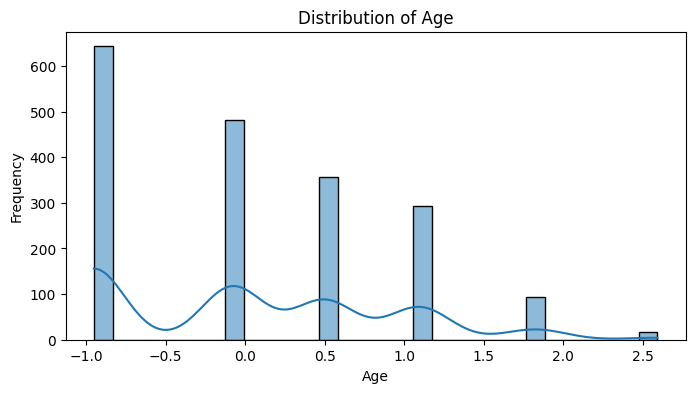

In [12]:
# Summary statistics for Age
print(df['Age'].describe())

# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Frequency Counts for Categorical Variables (Gender, Education, Country, and Ethnicity)


In [13]:
# Frequency distribution of Gender
print(df['Gender'].value_counts())

# Frequency distribution of Education
print(df['Edu'].value_counts())

# Frequency distribution of Country
print(df['Country'].value_counts())

# Frequency distribution of Ethnicity
print(df['Ethn'].value_counts())


-0.48246    943
 0.48246    942
Name: Gender, dtype: int64
-0.61113    506
 0.45468    480
 1.16365    283
-0.05921    270
-1.22751    100
-1.73790     99
 1.98437     89
-1.43719     30
-2.43591     28
Name: Edu, dtype: int64
 0.96082    1044
-0.57009     557
-0.28519     118
 0.24923      87
-0.09765      54
 0.21128      20
-0.46841       5
Name: Country, dtype: int64
-0.31685    1720
 0.11440      63
-1.10702      33
-0.50212      26
 0.12600      20
-0.22166      20
 1.90725       3
Name: Ethn, dtype: int64


Visualizations can help in identifying imbalances in the representation of different categories.

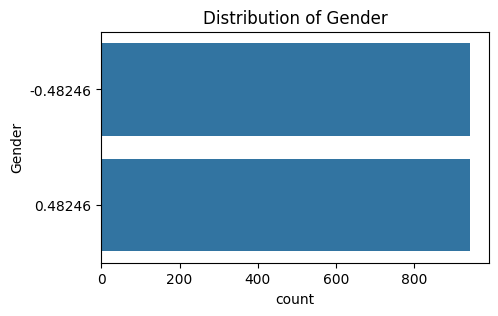

In [21]:
# Visualizing the distribution of Gender
plt.figure(figsize=(5, 3))
sns.countplot(y='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

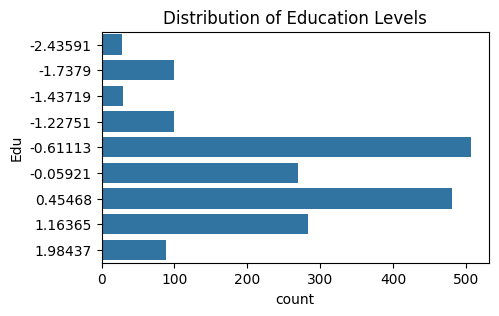

In [17]:
# Visualizing the distribution of Education
plt.figure(figsize=(5, 3))
sns.countplot(y='Edu', data=df)
plt.title('Distribution of Education Levels')
plt.show()

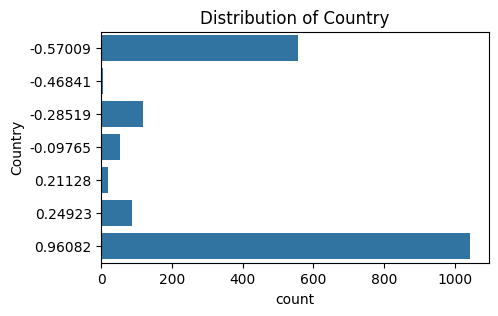

In [20]:
# Visualizing the distribution of Education
plt.figure(figsize=(5, 3))
sns.countplot(y='Country', data=df)
plt.title('Distribution of Country')
plt.show()

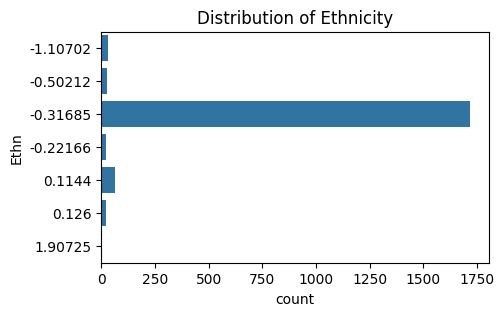

In [22]:
# Visualizing the distribution of Education
plt.figure(figsize=(5, 3))
sns.countplot(y='Ethn', data=df)
plt.title('Distribution of Ethnicity')
plt.show()

### Cross-tabulations


Cross-tabulations can help in understanding how two categorical variables interact with each other, which can be useful for identifying biases in subgroup representations.

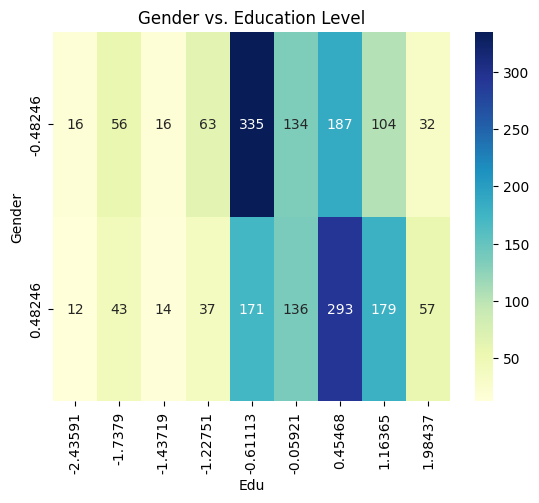

In [45]:
# Cross-tabulation of Gender and Education
#print(pd.crosstab(df['Gender'], df['Edu']))

# Visualize this crosstabulation
sns.heatmap(pd.crosstab(df['Gender'], df['Edu']), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Gender vs. Education Level')
plt.show()

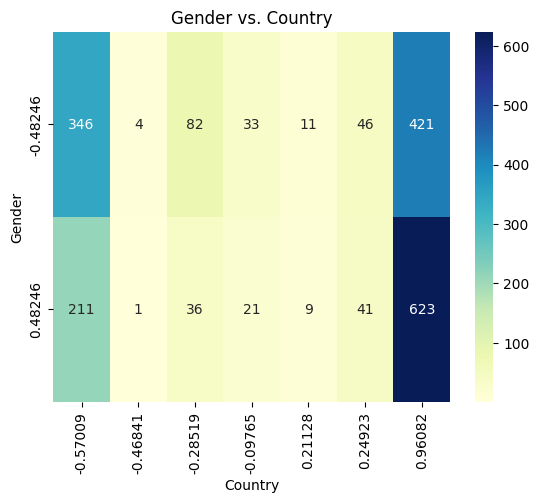

In [44]:
# Cross-tabulation of Gender and Country
#print(pd.crosstab(df['Gender'], df['Country']))

# Visualize this crosstabulation
sns.heatmap(pd.crosstab(df['Gender'], df['Country']), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Gender vs. Country')
plt.show()

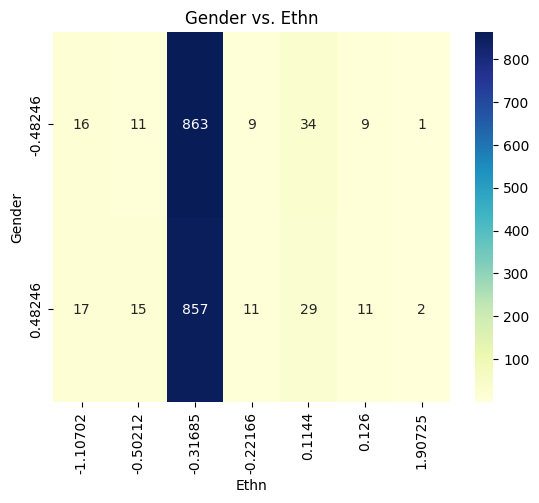

In [43]:
# Cross-tabulation of Gender and Ethn
#print(pd.crosstab(df['Gender'], df['Ethn']))

# Visualize this crosstabulation
sns.heatmap(pd.crosstab(df['Gender'], df['Ethn']), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Gender vs. Ethn')
plt.show()

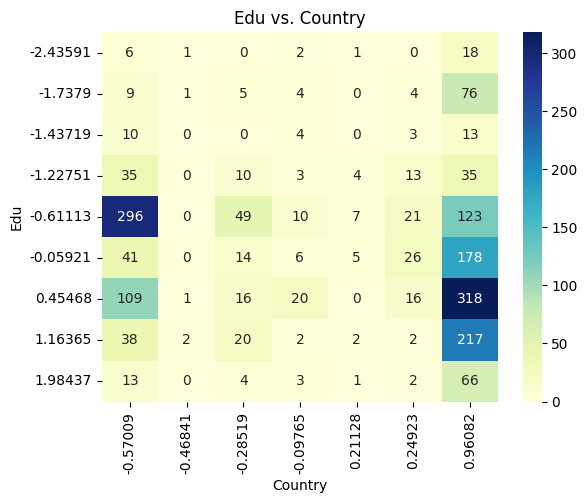

In [42]:
# Cross-tabulation of Edu and Country
#print(pd.crosstab(df['Edu'], df['Country']))

# Visualize this crosstabulation
sns.heatmap(pd.crosstab(df['Edu'], df['Country']), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Edu vs. Country')
plt.show()

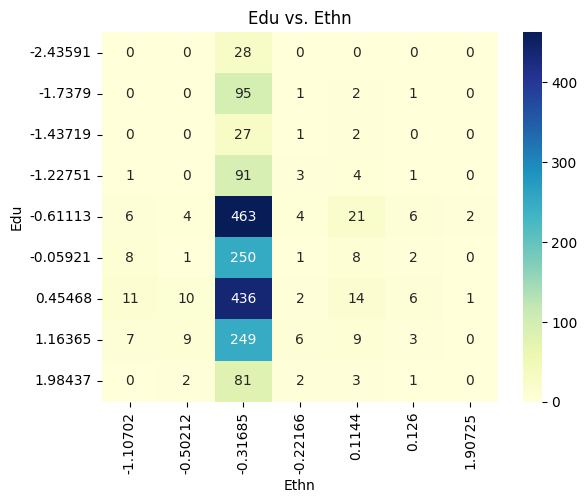

In [41]:
# Cross-tabulation of Edu and Ethn
#print(pd.crosstab(df['Edu'], df['Ethn']))

# Visualize this crosstabulation
sns.heatmap(pd.crosstab(df['Edu'], df['Ethn']), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Edu vs. Ethn')
plt.show()

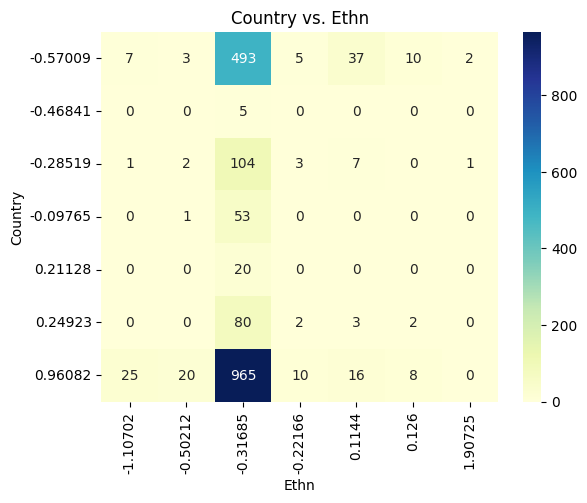

In [40]:
# Cross-tabulation of Country and Ethn
#print(pd.crosstab(df['Country'], df['Ethn']))

# Visualize this crosstabulation
sns.heatmap(pd.crosstab(df['Country'], df['Ethn']), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Country vs. Ethn')
plt.show()

### Underrepresentation or Overrepresentation Analysis

1. Gender:

 - The dataset appears balanced between male (-0.48246) and female (0.48246) participants, suggesting no significant gender bias.

2. Education (Edu):

 - There's a varied distribution in education levels, with some levels (e.g., -0.61113) being more represented than others (e.g., -2.43591). Higher levels of education (e.g., 1.98437) are less represented, which could introduce bias in analyzing drug consumption patterns across different education levels.

3. Country:

 - The majority of participants are from one country (0.96082), likely indicating the UK given its positive representation. Other countries, especially those with codes -0.46841 and -0.28519, are underrepresented, which might limit the generalizability of the findings to those regions.

4. Ethnicity (Ethn):

 - A significant majority identify with one ethnicity (-0.31685), likely White, given the context. Other ethnic groups (e.g., 1.90725) are significantly underrepresented, potentially introducing ethnic bias in the analysis.

### Addressing Representation Bias

1. Increasing Diversity in Sample:

 - For future data collection, aim to increase the representation of underrepresented groups. This could involve targeted recruitment efforts in countries, educational institutions, and communities that are less represented.

2. Weighting Responses:

 - Apply weighting to responses from underrepresented groups to increase their influence on the analysis. This method can help mitigate some effects of representation bias, though it doesn't replace the need for a diverse sample.

3. Stratified Analysis:

 - Perform separate analyses for each demographic group to understand drug consumption patterns within those groups. This can help identify if certain patterns are more pronounced in one group compared to others.

4. Use of External Benchmarks:

 - Compare our sample distribution against external benchmarks, to understand how representative our sample is of the broader population. This can guide efforts to correct for representation biases.

5. Sensitivity Analysis:

 - Conduct sensitivity analyses to determine how changes in the representation of different groups might affect our findings. This can help assess the robustness of our results to potential biases.

6. Transparent Reporting:

 - Clearly report the demographic composition of our dataset and any limitations this might introduce to our findings. Transparency about potential biases allows readers to interpret the results within the appropriate context.

## 5. Correlation & Bias Analysis

### Personality traits Correlation

#### Non-categorical data

When we create features for a dataset. It is also possible that some of the features maybe highly correlated. This potentially makes certain features redudant in their use in our classifier or make training our classifier unstable.
There are also possible correlations that the features may have with our target, therefore it is also nice to measure the correlation between them.
We can simply measure the correlation across multiple variables in our dataset with the following code.

Note: Correlations are mainly defined for non-categorical, so we only measure those in this dataset

It's essential to note that correlation does not imply causation, and these relationships are purely observational from the dataset provided. Furthermore, **interpreting correlations for categorical variables such as Gender, Country, and Ethnicity should be done cautiously since Pearson's correlation is not typically the best measure for categorical data.**

Using Pearson Correlation Coefficient to measure the linear correlation between the variables aiming to identify groups of drugs with strongly correlated consumption patterns.

- Focusing on personality traits and drug consumption variables.
- Correlation Matrix: Calculate the Pearson Correlation Coefficient for each pair of the variables of interest. In this case, this would likely include the personality traits (Neuro, Extr, Open, Agree, Consc, Impul, Sensat) and the drug consumption columns (Alc, Amphet, Amyl, etc.).

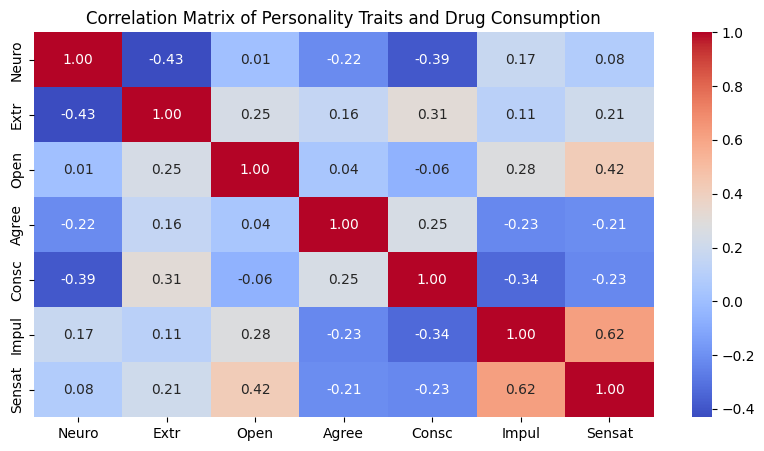

In [55]:
# Include personality traits and drug consumption columns
relevant_columns = [
    "Neuro", "Extr", "Open", "Agree", "Consc", "Impul", "Sensat"
]

# Select relevant columns for correlation analysis
data_for_analysis = df[relevant_columns]

# Calculate the Pearson Correlation Matrix
correlation_matrix = data_for_analysis.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Personality Traits and Drug Consumption')
plt.show()

The summarized observations:

- Neuroticism (Neuro) and Extraversion (Extr):
Strong negative correlation (-0.43), indicating that individuals with high neuroticism tend to have lower extraversion, and vice versa.
- Neuroticism (Neuro) and Conscientiousness (Consc):
Negative correlation (-0.39), suggesting that individuals with high neuroticism tend to be less conscientious.
- Extraversion (Extr) and Openness (Open):
Positive correlation (0.25), suggesting that individuals who are more extraverted are also likely to be more open to experience.
- Openness (Open) and Sensation-Seeking (Sensat):
Strong positive correlation (0.42), indicating a significant relationship between the desire for new experiences and the tendency for sensation-seeking.
- Agreeableness (Agree) and Conscientiousness (Consc):
Positive correlation (0.25), suggesting that individuals who are more agreeable also tend to be more conscientious.
- Conscientiousness (Consc) and Impulsivity (Impul):
Strong negative correlation (-0.34), indicating that individuals who are more conscientious tend to be less impulsive.
- Impulsivity (Impul) and Sensation-Seeking (Sensat):
Very strong positive correlation (0.62), highlighting that impulsivity and sensation-seeking traits are closely linked.

These results suggest that certain personality traits are inversely related (e.g., neuroticism and extraversion), while others show a tendency to occur together (e.g., impulsivity and sensation-seeking).

### Drug Consumption Correlation

#### Categorical data



The analysis of our dataset indicates that all the specified ordinal features have ties, meaning that there are repeated ranks within each feature. This is expected with ordinal data, where multiple subjects may fall into the same category or level for a given feature.

Given the presence of ties in all these features, methods such as Spearman's Rank Correlation and Kendall's Tau are suitable for analyzing the correlation. Both methods can handle ties in the data:

- Spearman's Rank Correlation: This method will adjust the rank calculations to account for ties, and it is appropriate when we want to assess the strength and direction of a monotonic relationship between two variables.

- Kendall's Tau: This method is particularly useful for smaller datasets or when there are many ties. It measures the strength of the association based on concordant and discordant pairs and is less sensitive to ties than Spearman's rank correlation.

##### Spearman's Rank Correlation

This approach is suitable for our data because it evaluates the monotonic relationship between the ranks of these ordinal features, allowing us to assess how the consumption of one substance may relate to the consumption of another.

https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php

In [57]:
# List of columns for which to calculate Spearman's Rank Correlation
columns_of_interest = [
    "Alc", "Amphet", "Amyl", "Benzos", "Caff", "Can", "Choco", "Coke", "Crack",
    "Ecst", "Her", "Ket", "Leghighs", "LSD", "Meth", "Mush", "Nico", "VSA"
]

# Calculate the Spearman's Rank Correlation Matrix
spearman_corr_matrix = df[columns_of_interest].corr(method='spearman')

In [58]:
# Display the correlation matrix
#print(spearman_corr_matrix)

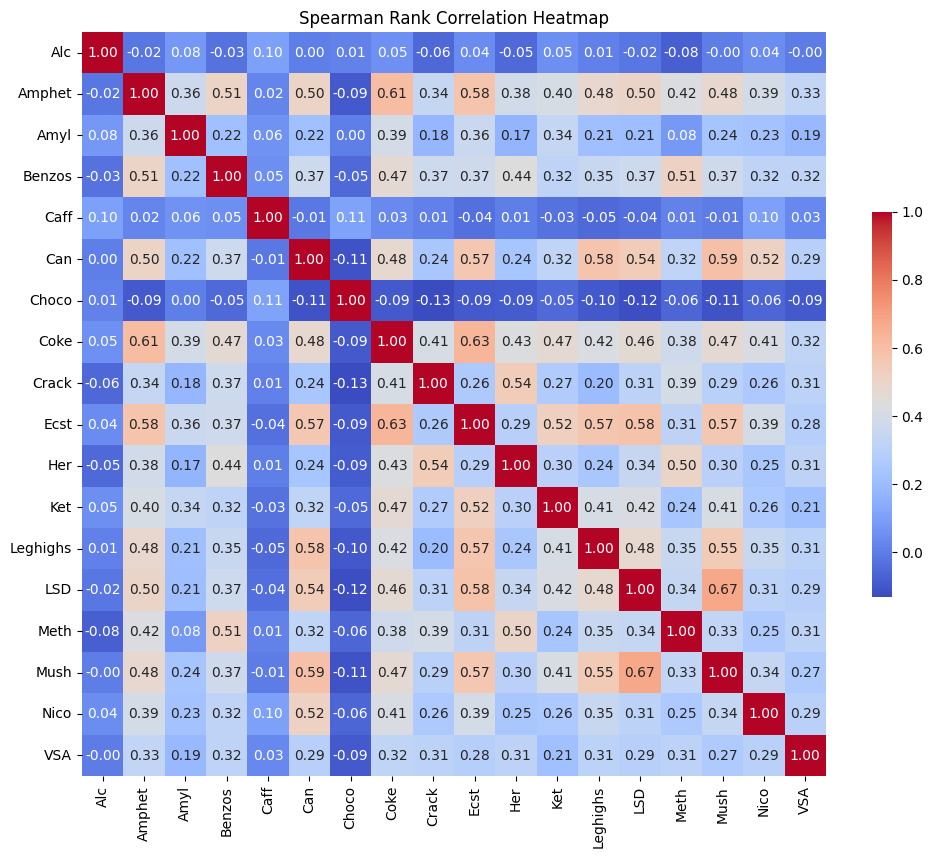

In [59]:
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Spearman Rank Correlation Heatmap')
plt.show()

**Results:**

- Alcohol (Alc) has no strong correlation with any of the substances. The highest correlation is a positive one with caffeine (Caff) (ρ = 0.103), which is relatively weak but statistically significant.

- Amphetamines (Amphet) show strong positive correlations with several substances, including cocaine (Coke) (ρ = 0.605), ecstasy (Ecst) (ρ = 0.579), and LSD (ρ = 0.497). This suggests that use of amphetamines is often associated with the use of these other substances.

- Amyl Nitrite (Amyl) has a moderate positive correlation with amphetamines (ρ = 0.364), suggesting some association in usage patterns.

- Benzodiazepines (Benzos) are strongly correlated with amphetamines (ρ = 0.505) and methadone (Meth) (ρ = 0.514), indicating a significant association in consumption patterns.

- Caffeine (Caff) has only a very weak correlation with alcohol (ρ = 0.103), and no significant correlations with most other substances.

- Cannabis (Can) shows strong positive correlations with legal highs (Leghighs) (ρ = 0.577), LSD (ρ = 0.543), and mushrooms (Mush) (ρ = 0.594), which are among the highest correlations observed in this set, suggesting a pattern where cannabis users are also likely to use these substances.

- Chocolate (Choco) has no significant correlations with drug use, suggesting that chocolate consumption does not relate in a meaningful way to the use of the drugs in question.

- Cocaine (Coke) is strongly correlated with ecstasy (ρ = 0.630) and moderately with amphetamines (ρ = 0.605), indicating that users of cocaine are likely to also use these substances.

- Crack has a moderate positive correlation with heroin (Her) (ρ = 0.543), which is a notable association.

- Ecstasy (Ecst), as noted, is strongly correlated with cocaine (ρ = 0.630) and has a high correlation with LSD (ρ = 0.582) and mushrooms (ρ = 0.565).

- Heroin (Her) shows a notably high correlation with crack (ρ = 0.543), indicating that these two drugs may often be used together.

- Ketamine (Ket), Legal Highs (Leghighs), LSD, Methadone (Meth), Mushrooms (Mush), Nicotine (Nico), and Volatile Substance Abuse (VSA) all show various levels of moderate to strong positive correlations with other substances, suggesting overlapping usage patterns.

- LSD shows the strongest correlation with mushrooms (ρ = 0.674), which is consistent with both being psychedelic drugs.

These correlations suggest patterns of polysubstance use and could be indicative of broader behavioral or social factors that influence drug use. The strong correlations particularly among certain classes of substances (like stimulants or psychedelics) may reflect cultural or subcultural patterns of use.

##### Kendall's Tau Correlation test

This script will calculate and print out the Kendall's Tau correlation coefficient (τ) and the corresponding p-value for each pair of features. The correlation coefficient measures the strength and direction of the association, while the p-value assesses the significance of the correlation (typically, a p-value below 0.05 indicates statistical significance).

In [60]:
from scipy.stats import kendalltau

In [61]:
# Prepare a dictionary to store Kendall's Tau results
kendalls_tau_results = {}

# Calculate Kendall's Tau for each pair of features
for i in range(len(columns_of_interest)):
    for j in range(i + 1, len(columns_of_interest)):
        col1 = columns_of_interest[i]
        col2 = columns_of_interest[j]
        # Compute Kendall's Tau correlation
        tau, p_value = kendalltau(df[col1], df[col2])
        # Store the result in the dictionary
        kendalls_tau_results[(col1, col2)] = {'tau': tau, 'p_value': p_value}


In [63]:
# Print the results
#for pair, result in kendalls_tau_results.items():
 #   print(f"{pair}: Kendall's Tau = {result['tau']:.3f}, p-value = {result['p_value']:.3e}")

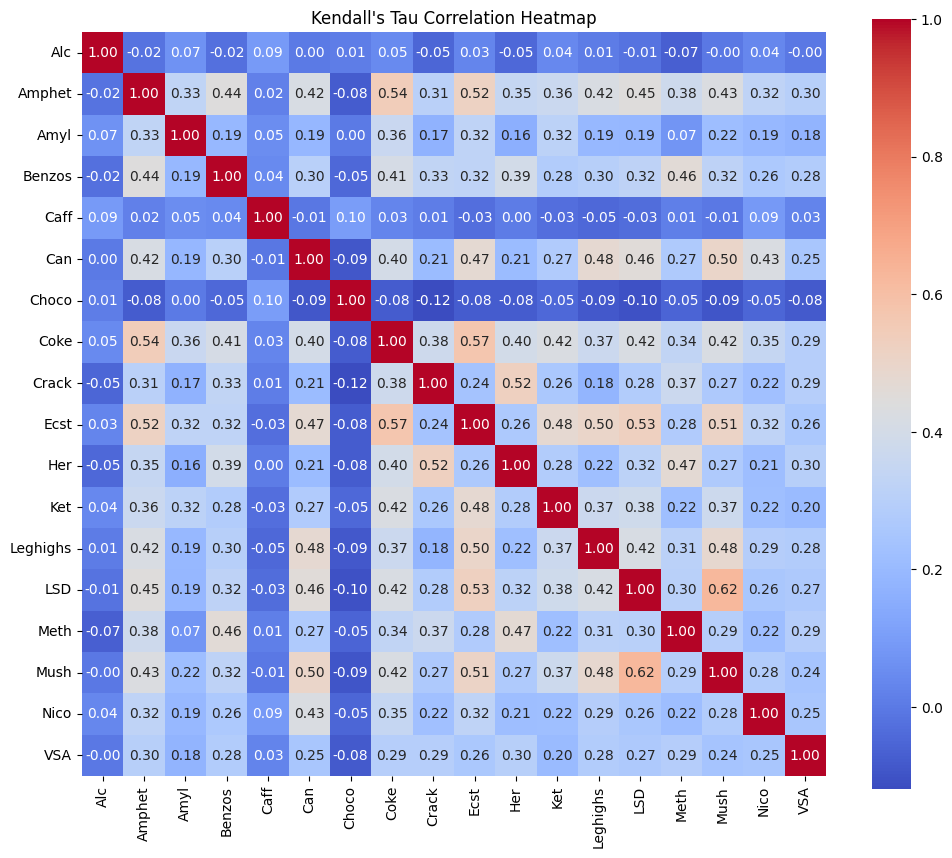

In [64]:
# Initialize an empty DataFrame for the correlation matrix
tau_matrix = pd.DataFrame(index=columns_of_interest, columns=columns_of_interest)

# Populate the correlation matrix with the Kendall's Tau results
for (col1, col2), res in kendalls_tau_results.items():
    tau_matrix.at[col1, col2] = res['tau']
    tau_matrix.at[col2, col1] = res['tau']  # Mirror the matrix

# The diagonal will be 1's for Kendall's Tau, so we fill the diagonal
np.fill_diagonal(tau_matrix.values, 1)

# Convert the matrix to numeric type (it's filled with strings initially)
tau_matrix = tau_matrix.astype(float)

# Now, plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(tau_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Kendall\'s Tau Correlation Heatmap')
plt.show()

**Results:**

- Low Correlation with Alcohol (Alc):

 - Most substances have very low to no correlation with 'Alc', with Kendall's Tau values close to zero and non-significant p-values (greater than 0.05), such as 'Amphet' and 'Can'.

- Significant Correlations:

 - 'Alc' and 'Amyl' show a positive correlation (τ = 0.065) with a significant p-value (0.0011), suggesting a moderate association.
 - 'Alc' and 'Caff' also have a positive correlation (τ = 0.091) with a very significant p-value (6.35e-06), indicating a stronger association.
 - 'Alc' and 'Coke' (τ = 0.046), 'Alc' and 'Crack' (τ = -0.051), and 'Alc' and 'Her' (τ = -0.048) show moderate correlations with significant p-values, suggesting some level of association.

- Strong Correlations Between Stimulants:

 - 'Amphet' and 'Coke' have a very strong positive correlation (τ = 0.541) with an extremely significant p-value (less than 1.0e-170), suggesting a very strong association.
 - Similar strong positive correlations are observed between 'Amphet' and 'Ecst' (τ = 0.516), 'Amphet' and 'Benzos' (τ = 0.440), 'Amphet' and 'Can' (τ = 0.418), and 'Amphet' and 'Mush' (τ = 0.429).

- Psychedelics:

 - 'LSD' and 'Mush' show an exceptionally strong positive correlation (τ = 0.625) with a highly significant p-value, indicating that individuals who use one are very likely to use the other.

- Other Notable Correlations:

 - 'Coke' and 'Ecst' (τ = 0.573), 'Can' and 'Ecst' (τ = 0.474), 'Can' and 'Mush' (τ = 0.499), indicating strong associations in usage patterns among these substances.

In summary, the results show that there are varying levels of association between different substances. Stimulant drugs tend to have strong correlations with each other, as do psychedelic substances. The significance of these correlations (as indicated by the p-values) suggests that the associations are not due to chance, and there may be underlying patterns of polydrug use within the population from which the data was collected.

##### SRC v.s. KTC

**Similarities**:
1. Strong Correlation Among Stimulants: Both Spearman's and Kendall's Tau show strong correlations among stimulant drugs like amphetamines, cocaine, and ecstasy. This is a consistent pattern indicating that users of one stimulant are likely to use others.
2. Psychedelic Drugs Relationship: LSD shows strong correlations with mushrooms in both analyses, suggesting a common pattern of use among psychedelic substances.
3. Cannabis Association: Cannabis is positively correlated with other substances such as legal highs and LSD in both Spearman's and Kendall's Tau correlations, reflecting a tendency for cannabis users to also engage in the use of these substances.
4. No Significant Association with Alcohol: Alcohol generally shows weak correlations with most substances in both methods, which may indicate its widespread use across different user profiles.
5. Negative Correlations Are Rare: Both methods indicate that there are few strong negative correlations between the substances, suggesting that there isn't a tendency to use one substance over another among the user population.
**Differences:**
1. Strength of Correlations: While both methods show similar patterns of correlation, the strength of the correlations often differs. Spearman's Rank Correlation coefficients tend to be higher because Spearman's method uses squared differences, which can amplify strong relationships.
2. Statistical Significance: The p-values in Kendall's Tau are generally smaller (more significant) for the same correlations compared to Spearman's Rank Correlation. This can be due to the different ways the two methods calculate the significance of the correlation.
3. Sensitivity to Outliers: Spearman's Rank Correlation is less sensitive to outliers than Kendall's Tau because it ranks the data. If there are outliers with extreme ranks, Spearman's correlation can still show a strong relationship, whereas Kendall's Tau may be more affected by such disparities.
4. Complexity and Interpretation: Kendall's Tau is often considered a more refined measure of correlation for small sample sizes or for data with many ties. It is interpreted as the difference between the probability that the observed data is in the same order versus in different orders.

Despite these methodological differences, the overall patterns they reveal in our data are consistent.

### Demographic Variables & Drug Consumption Correlation

Given that both sets of variables are treated as ordinal, traditional Pearson correlation might not be the most appropriate measure for all cases, especially for ordinal with ordinal. However, for simplicity and initial exploration, we can still use Pearson correlation as a starting point to identify potential relationships. For a more nuanced analysis, especially between ordinal variables, consider Spearman's rank correlation or Kendall's tau correlation, which are better suited for ordinal data.

In [70]:
# Define demographic and drug consumption columns separately for clarity
demographic_columns = ["Age", "Gender", "Edu", "Country", "Ethn"]
drug_consumption_columns = ["Alc", "Amphet", "Amyl", "Benzos", "Caff", "Can", "Choco", "Coke", "Crack", "Ecst", "Her", "Ket", "Leghighs", "LSD", "Meth", "Mush", "Nico", "Semeron"]

# Select relevant columns for correlation analysis
# Note: This step remains unchanged, just separating the selection for clarity
data_for_analysis = df[demographic_columns + drug_consumption_columns]

#### Pearson correlation

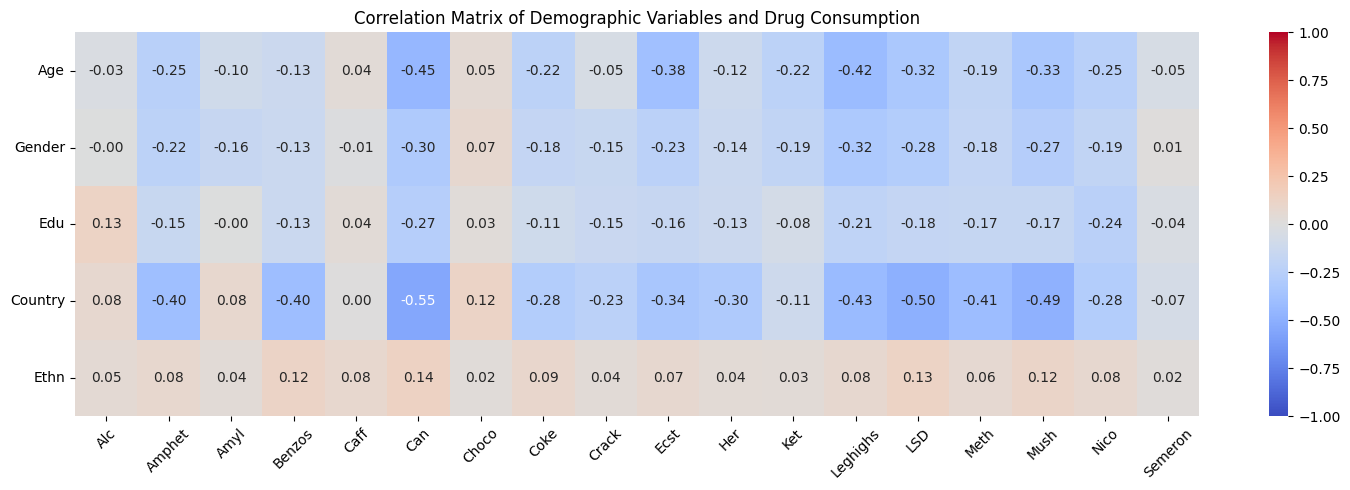

In [71]:
# Calculate the Pearson Correlation Matrix
correlation_matrix = data_for_analysis.corr()

# Now, filter the correlation matrix to only show correlations between demographic and drug consumption variables
# This involves keeping the rows for demographic variables and columns for drug consumption
correlation_matrix_filtered = correlation_matrix.loc[demographic_columns, drug_consumption_columns]

# Visualize the filtered correlation matrix using a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed to accommodate the number of variables
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Demographic Variables and Drug Consumption')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Ensure y labels are horizontal for clarity
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()

**Results:**

- Pearson correlation measures linear relationships between variables. However, because many of our variables are ordinal, Pearson may not be the best measure. Despite this, it can still provide initial insights.
- The heatmap shows mostly weak to moderate correlations, with values ranging between -0.55 and 0.15.
- The strongest negative correlation appears to be between Country and Benzos (-0.55), which may suggest that the country of residence could be an indicator of benzodiazepine consumption patterns.

#### Spearman's Rank Correlation

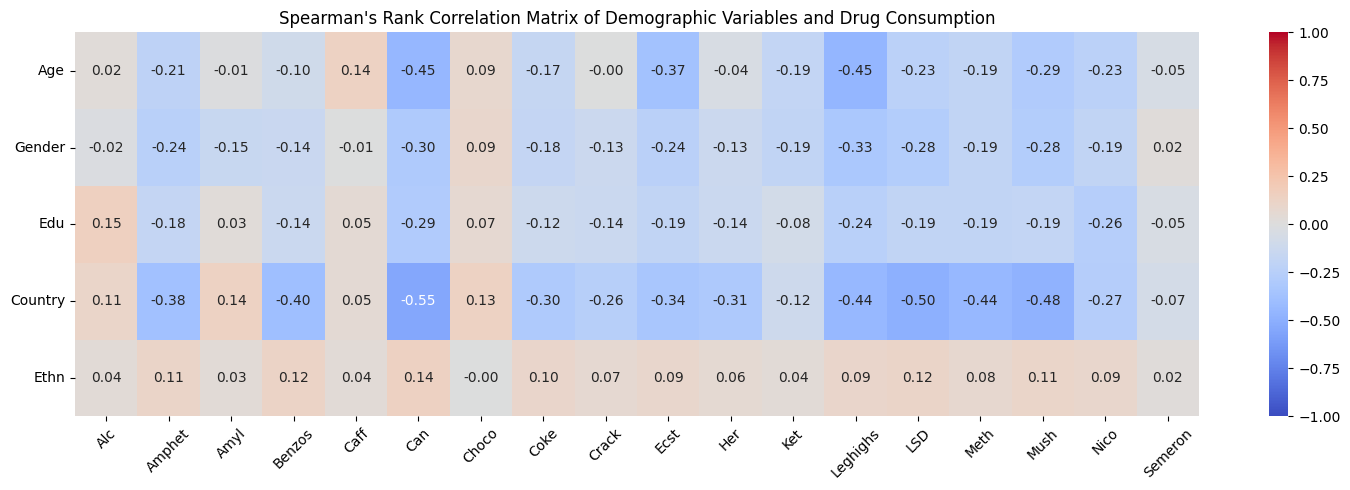

In [72]:
# Calculate the Spearman's Rank Correlation Matrix
spearman_corr_matrix = data_for_analysis.corr(method='spearman')

# Filter the Spearman correlation matrix to only show correlations between demographic and drug consumption variables
spearman_corr_filtered = spearman_corr_matrix.loc[demographic_columns, drug_consumption_columns]

# Visualize the filtered Spearman's correlation matrix using a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
sns.heatmap(spearman_corr_filtered, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman's Rank Correlation Matrix of Demographic Variables and Drug Consumption")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Ensure y labels are horizontal for clarity
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()

**Results:**

- Spearman's rank correlation measures the monotonic relationship between variables, making it more suitable for ordinal data.
- Similar to the Pearson results, the strongest correlations are negative and involve the Country variable, particularly with Benzos (-0.55) and Can (cannabis, -0.45), suggesting a potential relationship between these drugs' consumption and the country of residence.

#### Kendall's Tau Correlation

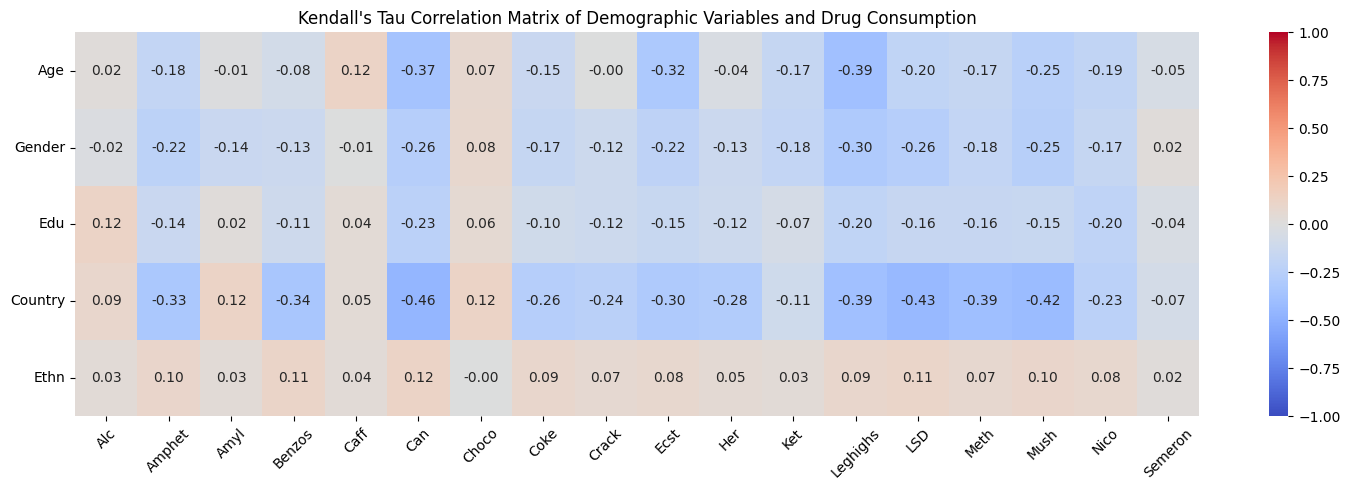

In [73]:
# Calculate the Kendall's Tau Correlation Matrix
kendall_tau_corr_matrix = data_for_analysis.corr(method='kendall')

# Filter the Kendall's Tau correlation matrix to only show correlations between demographic and drug consumption variables
kendall_tau_corr_filtered = kendall_tau_corr_matrix.loc[demographic_columns, drug_consumption_columns]

# Visualize the filtered Kendall's Tau correlation matrix using a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
sns.heatmap(kendall_tau_corr_filtered, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Kendall's Tau Correlation Matrix of Demographic Variables and Drug Consumption")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Ensure y labels are horizontal for clarity
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()

**Results:**

- Kendall's Tau correlation is another non-parametric measure that is well-suited for small datasets with many tied ranks.
- The results are consistent with Spearman's, showing similar patterns of correlation. The strongest negative correlation is again observed between Country and Benzos (-0.46), reinforcing the findings from the Spearman's correlation.
- The correlations are weaker overall compared to Spearman's, which is typical because Kendall's Tau generally produces lower correlation coefficients.

#### Considerations for Further Analysis

1. Contextual Understanding: It's crucial to understand the context behind the demographic variables, especially Country, to interpret these correlations correctly. For example, the legal status of certain drugs, cultural attitudes towards drug use, or socioeconomic factors could all influence these results.

2. Subgroup Analysis: To dig deeper into the patterns suggested by the correlations, perform subgroup analyses. For instance, we might investigate drug consumption patterns within specific countries or compare countries with similar legal and cultural attitudes towards drugs.

3. Multiple Comparisons: Since multiple hypotheses are being tested simultaneously (multiple correlations), there's a risk of Type I error inflation. Consider adjusting for multiple comparisons using methods such as Bonferroni correction or False Discovery Rate (FDR).

4. Qualitative Data: Correlation does not imply causation. Qualitative data such as policy analysis, cultural research, and individual drug use history would be invaluable in explaining why certain demographics correlate with drug use patterns.

5. Sampling Methods: Reflect on the sampling methods used to collect the data. If certain countries or demographics are overrepresented in the sample, this could skew the correlations and should be addressed in the analysis and interpretation.

## Boxplots

To see more detailed visual representation of how benzodiazepine consumption varies across different countries and between genders. This type of plot can help us see the distribution of benzodiazepine consumption scores for each country, split by gender, which may help in identifying any potential patterns or outliers.

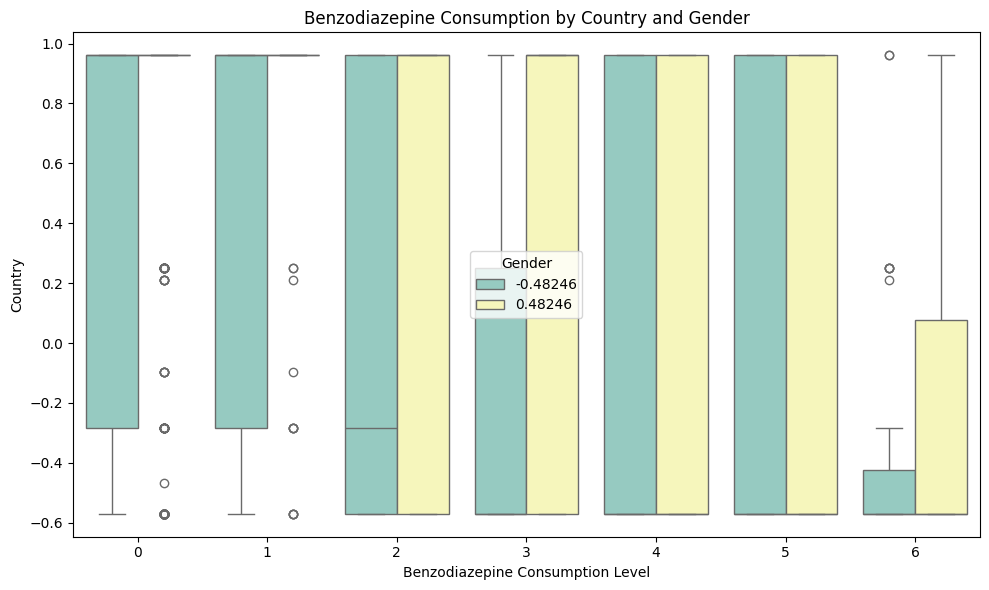

In [82]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Benzos', y='Country', hue='Gender', data=df, palette="Set3")

# Adjust the plot as needed for better readability
plt.title('Benzodiazepine Consumption by Country and Gender')
plt.xlabel('Benzodiazepine Consumption Level')
plt.ylabel('Country')
plt.legend(title='Gender')
plt.tight_layout()  # Adjust layout to fit everything properly

# Display the plot
plt.show()

1. Boxplot Interpretation:

 - Central Tendency: The line inside each box represents the median consumption level for that group. For most countries and both genders, the median consumption level is at 0, suggesting that the majority of the dataset contains non-users or low-level consumers of benzodiazepines.
 - Spread: The length of the boxes indicates the interquartile range (IQR), which represents the middle 50% of the data. A longer box indicates greater variability in consumption levels.
 - Outliers: Circles represent outliers, which are data points that fall outside the typical range (1.5 times the IQR above the third quartile or below the first quartile). Several outliers suggest that there are individuals with consumption levels significantly different from the median.
 - Skewness: Where we see the median line toward the bottom of the box (as in the country coded around -0.5 for level 6), it suggests a positive skew, meaning more individuals have higher consumption levels.

2. Comparing Countries: When comparing across countries, it is apparent that the country coded near -0.5 has a wider interquartile range and higher median at level 6 for males, indicating a more significant variance in benzodiazepine consumption among males in this country. On the contrary, in countries coded near 0.6 and 1.0, the interquartile range is much narrower, suggesting less variability in benzodiazepine consumption.

3. Variability Within Countries: The variability within each country can be assessed by the interquartile range of each box. For example, the country coded near -0.5 has a wide interquartile range at consumption level 6, indicating a high variability in benzodiazepine consumption among males in that country. This could suggest differences in accessibility, prescription practices, or cultural attitudes towards benzodiazepines.

4. Whiskers: The "whiskers" of the boxplot, which extend from the boxes, indicate the range of the data excluding outliers. The length of the whiskers can indicate how spread out the consumption levels are for each country and gender group.

5. Interpreting the Colors: The lighter shade represents one gender, while the darker shade represents the other. The legend associates the colors with numeric codes (-0.48246 and 0.48246), which likely correspond to male and female, respectively. Depending on the country, there are differences in the consumption level distributions between genders. However, without a clearer mapping to specific gender labels, the interpretation is somewhat ambiguous.

6. Low Consumption Levels: Many countries have their median at the lowest consumption level (0), indicating that the majority of participants from these countries report not using benzodiazepines.

7. High Consumption Levels: For the highest consumption level (6), there is a noticeable difference in the country coded near -0.5, where males show a higher median consumption level compared to females, suggesting a gender-specific pattern in this particular country.

8. Potential Data Issues: For countries coded near 0.6 and 1.0, there is a lack of representation at higher consumption levels (4, 5, and 6), which could indicate either a very low prevalence of benzodiazepine use in these countries or a sampling issue where high-level consumers were not captured in the dataset.